The **SuitabilityMappingTools.py** script is a Python-based geospatial analysis tool designed to process, analyze,
and conduct sensitivity assessments on raster datasets (GeoTIFF files).

The script is specifically built to facilitate **weighted overlay analysis** (WOA) or **weighted linear combinations** (WLC) for environmental and hydrological
suitability mapping, using raster layers representing different thematic variables
 (e.g., subsurface infiltration potential).


In this tutorial, I will demonstrate how to:

1. get info about your rasters
2. resample your rasters
3. select rasters to combine
4. set their weights
5. create a weighted index
6. perform a sensitivity analysis on the weighted index

In [ ]:
## install the required packages
pip install rasterio
pip install matplotlib
pip install pandas
pip install seaborn



In [2]:
import SuitabilityMappingTools as smt

SuitabilityMappingTools has been loaded


In [ ]:
# lets set the variables for where our data is, and where the results should go
data_dir = r'Data/'
output_dir = r'data/weighted_layers/'



In [7]:
# now lets get info on the layers we have
smt.get_dir_info(data_dir)

{'File': 'sLD.tif', 'Filepath': 'data\\sLD.tif', 'Projection': CRS.from_wkt('PROJCS["NAD83(2011) / UTM zone 12N",GEOGCS["NAD83(2011)",DATUM["NAD83_National_Spatial_Reference_System_2011",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1116"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6318"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-111],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","6341"]]'), 'Min Value': np.float32(5.0), 'Max Value': np.float32(9.0), 'Mean Value': np.float32(5.6258063), 'Extent': BoundingBox(left=440523.0521888148, bottom=3864773.116285199, right=466743.0521888148, top=3890873.116285199), 'Width': 874, 'Height': 870, 'Dimensions': (870, 874), 'Data Type': 'uint8'}


All our data is in the same projection, and is the same size. This is something you should always check. If the projections are different you will have to reproject the data before trying to use this tool. However if the data is not the same size, you can use the 

resample_layers() function to resample the data to the same size.

next lets plot the layers so I can explain what they are: use the `plot_layers()` function to do this

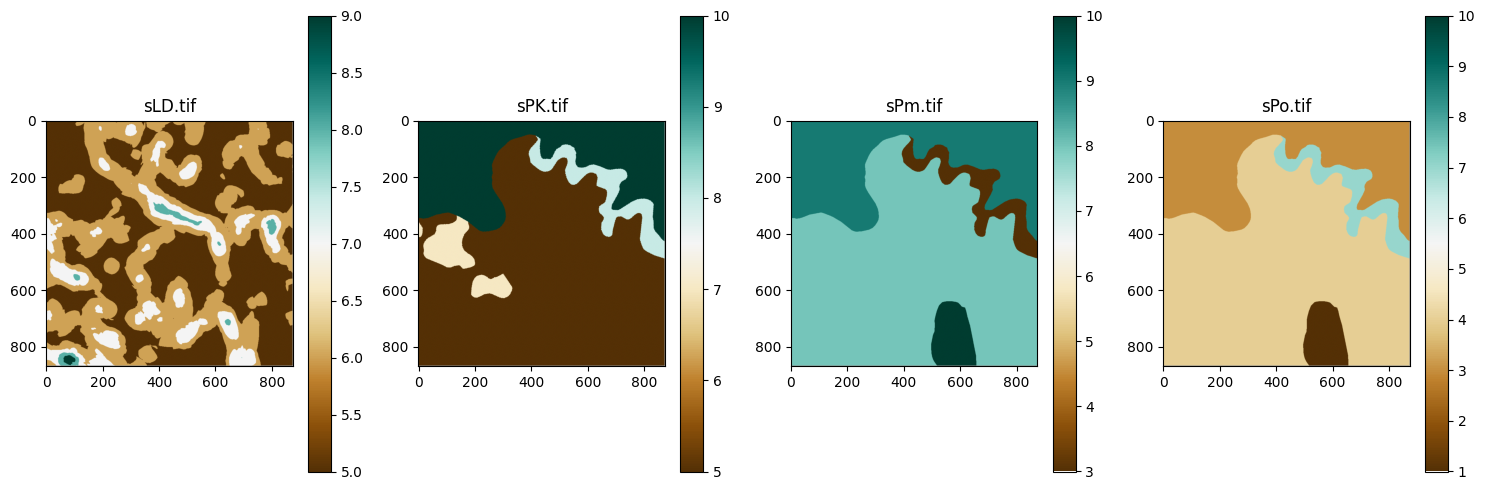

In [9]:
smt.plot_layers(data_dir)

There are 4 layers shown here and they are:

*sLD - scaled lineament density (5-10) created using 1-arcsec DEM extracted using PCI Geomatica Catalyst LINE Module
*sPK - Scaled Potential Karst (5-10) from USA Karst Map
*sPm - Scaled permeability (1-10) from GLHYMPS v2
*sPo - Scaled Porosity (1-10) fom GLHYMPS v2

All layers have been scaled (linearly) from 5-10 or 1-10. Permeability and Porosity represent the subsurface properties of lithology (particularly the matrix), while lineament density and potential karst represent give indications of the density of features that may have secondary or tertiary permeability and porosity 

We will now select the layers we want to combine.


![SbII index](Images\sbII_index.png)

In [ ]:
# run this line, and then look for the user input box at the top, then enter the indices of the layers you want 0-n
# I entered 0,1,2,3 for the example 
files_list = smt.select_tif_files(data_dir)



Available .tif files:
0: sLD
1: sPK
2: sPm
3: sPo
Enter the indices of the files you want to select (comma-separated)


In [12]:
# lets check the weights of these layers (by default they are equally weighted)

smt.check_weights(files_list)


Current file weights:
sLD.tif: 0.25
sPK.tif: 0.25
sPm.tif: 0.25
sPo.tif: 0.25
If weights are incorrect, run define_wights() function to change


In [14]:
# next lets set the weights of the layers, we are going to apply the following weights using the user_input box
# 0.15,0.2,0.4,0.25
file_list_w = smt.define_weights(files_list, True)



Current file weights:
sLD.tif: 0.25
sPK.tif: 0.25
sPm.tif: 0.25
sPo.tif: 0.25

Enter new weights (comma-separated). Make sure they sum to 1.


In [15]:
smt.check_weights(file_list_w)


Current file weights:
sLD.tif: 0.15
sPK.tif: 0.2
sPm.tif: 0.4
sPo.tif: 0.25
If weights are incorrect, run define_wights() function to change


In [16]:
# Now that we have set the weights lets combine the layers using those weights to create an index of subsurface infiltration potential

smt.create_weighted_index(file_list_w, 'SubsurfaceInfiltrationPotential')

output_file_directory: data\weighted_layers

Current file weights:
sLD.tif: 0.15
sPK.tif: 0.2
sPm.tif: 0.4
sPo.tif: 0.25

Generating weighted raster...
Raster Metadata Before Writing:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999, 'width': 874, 'height': 870, 'count': 1, 'crs': CRS.from_wkt('PROJCS["NAD83(2011) / UTM zone 12N",GEOGCS["NAD83(2011)",DATUM["NAD83_National_Spatial_Reference_System_2011",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1116"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6318"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-111],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","6341"]]'), 'transform': Affine(30.0, 0.0, 440523.0521888148,
       0.0, -30.0, 

c:\Users\rl587\Documents\GitHub\create_WLC_indices\SuitabilityMappingTools.py:312: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label/1000)}k' for label in ax.get_yticks()])


'data\\weighted_layers\\SubsurfaceInfiltrationPotential.tif'

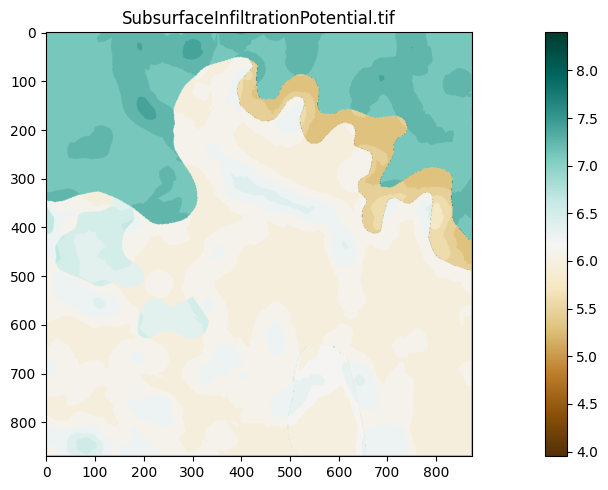

In [ ]:
# plot the resulting layer
smt.plot_layers(output_dir)

In [22]:
# next lets do a sensitivity analysis where we remove one variable at a time and see how the index changes

smt.sensitivity_analysis_removal(file_list_w, 'SbInfilPot')

Generating control scenario: SbInfilPot_RM_control.tif

Current file weights:
sLD.tif: 0.25
sPK.tif: 0.25
sPm.tif: 0.25
sPo.tif: 0.25

Generating weighted raster...
Raster Metadata Before Writing:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999, 'width': 874, 'height': 870, 'count': 1, 'crs': CRS.from_wkt('PROJCS["NAD83(2011) / UTM zone 12N",GEOGCS["NAD83(2011)",DATUM["NAD83_National_Spatial_Reference_System_2011",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1116"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6318"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-111],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","6341"]]'), 'transform': Affine(30.0, 0.0, 440523.0521888148,
      

c:\Users\rl587\Documents\GitHub\create_WLC_indices\SuitabilityMappingTools.py:312: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label/1000)}k' for label in ax.get_yticks()])
c:\Users\rl587\Documents\GitHub\create_WLC_indices\SuitabilityMappingTools.py:312: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label/1000)}k' for label in ax.get_yticks()])
c:\Users\rl587\Documents\GitHub\create_WLC_indices\SuitabilityMappingTools.py:312: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label/1000)}k' for label in ax.get_yticks()])
c:\Users\rl587\Documents\GitHub\create_WLC_indices\SuitabilityMappingTools.py:312: UserWarning: set_ticklabels() should only be used with a fi

Count of pixels (excluding no-data pixels): 757768
Percentage of pixels in bin 0: count = 0 :0.00%
Percentage of pixels in bin 1: count = 0 :0.00%
Percentage of pixels in bin 2: count = 0 :0.00%
Percentage of pixels in bin 3: count = 0 :0.00%
Percentage of pixels in bin 4: count = 161 :0.02%
Percentage of pixels in bin 5: count = 482558 :63.68%
Percentage of pixels in bin 6: count = 73681 :9.72%
Percentage of pixels in bin 7: count = 201194 :26.55%
Percentage of pixels in bin 8: count = 174 :0.02%
Percentage of pixels in bin 9: count = 0 :0.00%
Count of pixels (excluding no-data pixels): 757768
Percentage of pixels in bin 0: count = 0 :0.00%
Percentage of pixels in bin 1: count = 0 :0.00%
Percentage of pixels in bin 2: count = 0 :0.00%
Percentage of pixels in bin 3: count = 0 :0.00%
Percentage of pixels in bin 4: count = 161 :0.02%
Percentage of pixels in bin 5: count = 482558 :63.68%
Percentage of pixels in bin 6: count = 73681 :9.72%
Percentage of pixels in bin 7: count = 201194 :26.

c:\Users\rl587\Documents\GitHub\create_WLC_indices\SuitabilityMappingTools.py:312: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label/1000)}k' for label in ax.get_yticks()])
c:\Users\rl587\Documents\GitHub\create_WLC_indices\SuitabilityMappingTools.py:312: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label/1000)}k' for label in ax.get_yticks()])
c:\Users\rl587\Documents\GitHub\create_WLC_indices\SuitabilityMappingTools.py:312: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label/1000)}k' for label in ax.get_yticks()])


Count of pixels (excluding no-data pixels): 757768
Percentage of pixels in bin 0: count = 0 :0.00%
Percentage of pixels in bin 1: count = 0 :0.00%
Percentage of pixels in bin 2: count = 0 :0.00%
Percentage of pixels in bin 3: count = 31 :0.00%
Percentage of pixels in bin 4: count = 203 :0.03%
Percentage of pixels in bin 5: count = 409338 :54.02%
Percentage of pixels in bin 6: count = 346926 :45.78%
Percentage of pixels in bin 7: count = 1268 :0.17%
Percentage of pixels in bin 8: count = 2 :0.00%
Percentage of pixels in bin 9: count = 0 :0.00%
Generating scenario without sPm.tif -> SbInfilPot_RM_sPm.tif

Current file weights:
sLD.tif: 0.3333333333333333
sPK.tif: 0.3333333333333333
sPo.tif: 0.3333333333333333

Generating weighted raster...
Raster Metadata Before Writing:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999, 'width': 874, 'height': 870, 'count': 1, 'crs': CRS.from_wkt('PROJCS["NAD83(2011) / UTM zone 12N",GEOGCS["NAD83(2011)",DATUM["NAD83_National_Spatial_Reference_Syst

c:\Users\rl587\Documents\GitHub\create_WLC_indices\SuitabilityMappingTools.py:312: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label/1000)}k' for label in ax.get_yticks()])
c:\Users\rl587\Documents\GitHub\create_WLC_indices\SuitabilityMappingTools.py:312: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label/1000)}k' for label in ax.get_yticks()])
c:\Users\rl587\Documents\GitHub\create_WLC_indices\SuitabilityMappingTools.py:312: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(label/1000)}k' for label in ax.get_yticks()])


Raster Metadata Before Writing:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999, 'width': 874, 'height': 870, 'count': 1, 'crs': CRS.from_wkt('PROJCS["NAD83(2011) / UTM zone 12N",GEOGCS["NAD83(2011)",DATUM["NAD83_National_Spatial_Reference_System_2011",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1116"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","6318"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-111],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","6341"]]'), 'transform': Affine(30.0, 0.0, 440523.0521888148,
       0.0, -30.0, 3890873.116285199)}
✅ Weighted raster saved successfully: data\Sensitivity_Analysis\SbInfilPot_RM_sPo.tif
✅ File data\Sensitivity_Analysis\SbInfilPot_RM

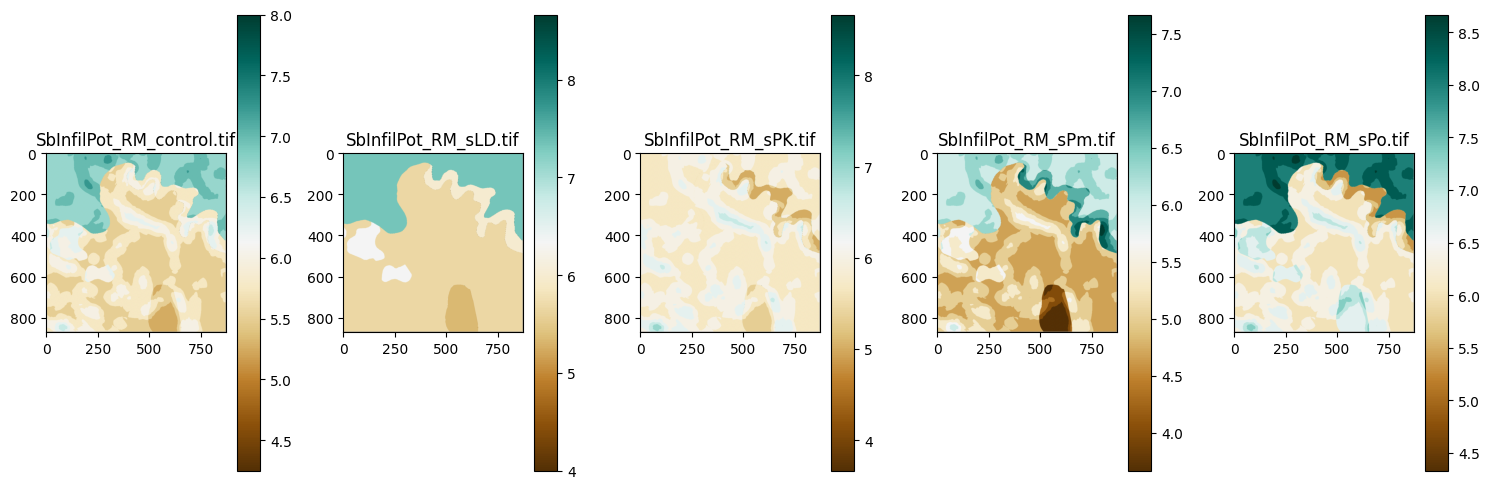

In [23]:
# now lets plot all those layers 
sensitvity_dir = r'data/sensitivity_analysis/'
smt.plot_layers(sensitvity_dir)